<a href="https://colab.research.google.com/github/taimur1871/covid_spread/blob/main/Rana_Assignment_Week0_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Exercise shows how to use Google colab to apply regression models.**
**Copy the Colab notebook and data to your google drive before proceeding.**

Step 1: Connect Google drive that stores the data with your Google Colab Notebook

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Replace the ID with ID of file you want to access. To get this ID: 

1.   Right-click on the name of the appropriate file in your Google Drive
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary argument of the call to `drive.CreateFile()` as the value associated with the 'id' key. Make sure that this value is a string.



In [ ]:
# Replace the ID with ID of file you want to access
# To get this ID, right-click on the name of the appropriate file in your 
downloaded = drive.CreateFile({'id':'1JIPldDJF841NYVLGO18AAXXKP_etwsfs'}) 
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

Step 2: Read the Data and verify its format!

In [1]:
# import moduels for data processing
import numpy as np
import numpy.matlib as matlib
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('time_series_covid_19_confirmed.csv') 
print("The shape of data=",data.shape)
data.head()

The shape of data= (266, 225)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


Step 3: Original data has [266x225] dimensions. Let's use only 50 rows and 100 columns.

In [3]:
rows=50
cols=100
data_new=data.iloc[:rows,4:cols+4]
print(data_new.shape)

(50, 100)


In [4]:
#view the sub-sectioned data
data_new.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


Step 4: Convert the Tablular data to format {X,Y}, where X={Longitude, Latitude, Date}, Y={#infected}

In [5]:
# Finding the date indices

data_row=data_new.sum(axis=0)
days=range(0,data_row.shape[0])
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(days_mat.shape)

(50, 100)


In [6]:
# Let's create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date, Y=#affected
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1)))

In [7]:
print(np.shape(X))
#Data Preparation is Done!

(5000, 3)


Step 5: Let's Plot the Data to see the converted Data format!

(5000, 3)


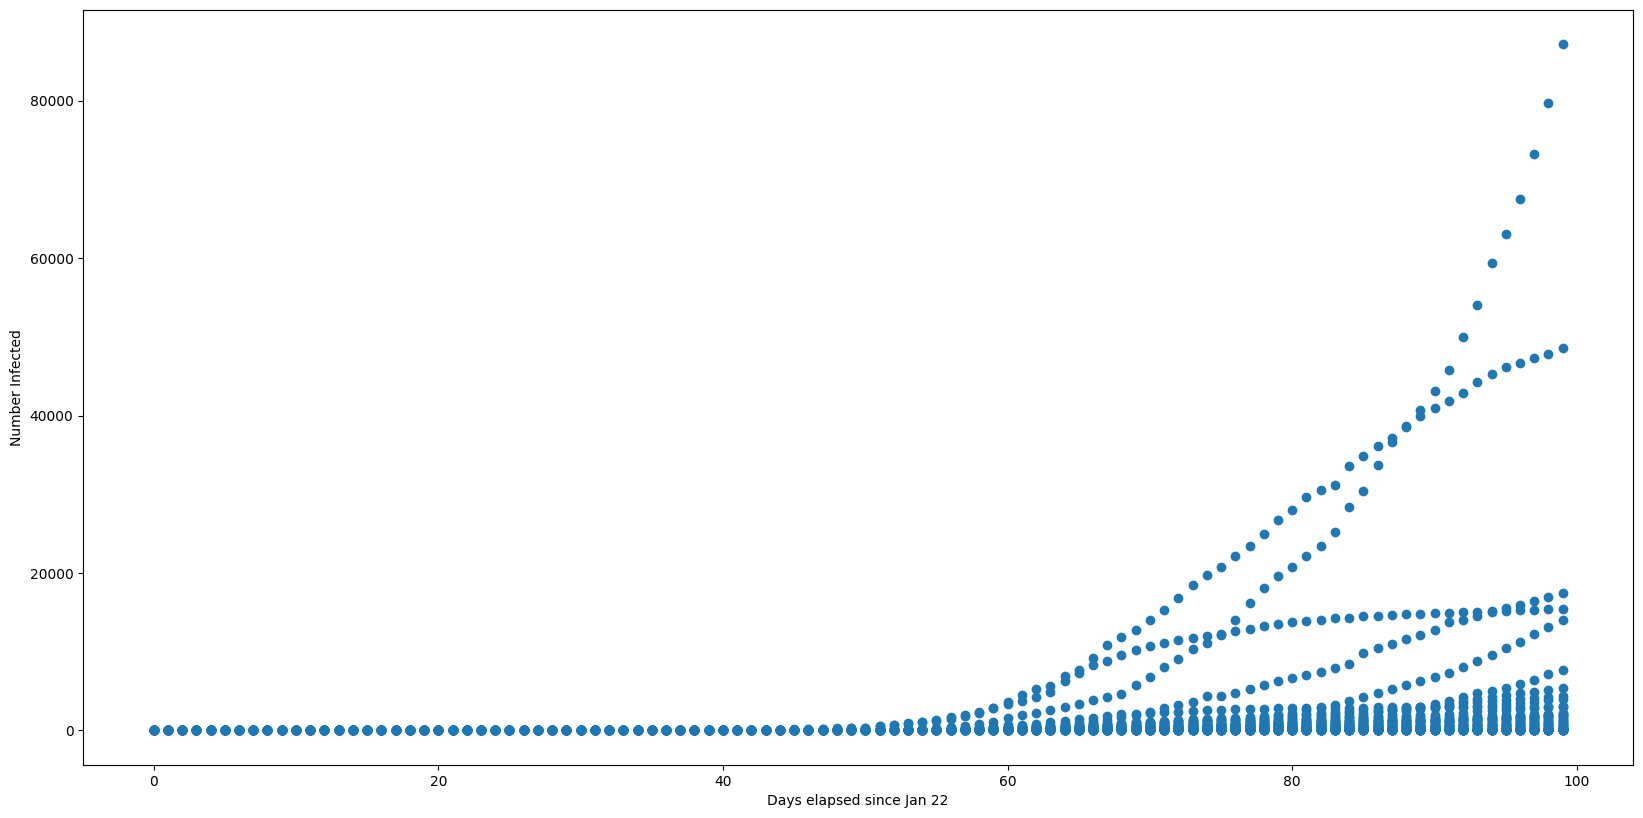

In [8]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(X[:,2],Y[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

Step 6: Let's spilt the data to training and test (70% train, 30% test)

In [9]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

Step 7: Let's fit Polynomial features of degree 3 to the features. This results in dimensions going from 3 to 20!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (7980, 20)
Linear Regression Coefficients are= [[ 0.00000000e+00  1.08195512e+02 -8.71484631e+00  3.30917339e+01
   2.20377196e+00  2.99669211e-01 -3.10917313e+00 -7.66337768e-02
   2.15786083e+00 -3.15576805e+00 -7.42616605e-02  3.12719044e-03
   1.43317729e-02  1.43412794e-04 -1.98682060e-02  6.46817673e-02
  -1.64113263e-03  4.98198787e-03 -3.00181677e-02  3.44067676e-02]]
constant coefficient= [-739.12870003]


## Trying various values of polynomial degrees to find best model

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

for i in range(2, 20):
  poly = PolynomialFeatures(degree=i)
  # Transform both the train and test data
  X_train = poly.fit_transform(X_train_1)
  X_test = poly.fit_transform(X_test_1)

  clf = LinearRegression()
  # Fit the model on train data only
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print('MSE for ', i, 'is', mse(y_test, y_pred))

MSE for  2 is 22409841.31414667
MSE for  3 is 20560548.002745174
MSE for  4 is 18150800.781314142
MSE for  5 is 14193417.434568293
MSE for  6 is 9116090.38274086
MSE for  7 is 4553747.836499236
MSE for  8 is 1647485.2115973928
MSE for  9 is 852998.2341865837
MSE for  10 is 292411.1100162444
MSE for  11 is 165820.39517132592
MSE for  12 is 59911.08382956185
MSE for  13 is 42823.76465792344
MSE for  14 is 48262.20936478368
MSE for  15 is 28638.23167982166
MSE for  16 is 53084.88832627358
MSE for  17 is 147700.78604214962
MSE for  18 is 32719.992937413055
MSE for  19 is 63681.47360981077


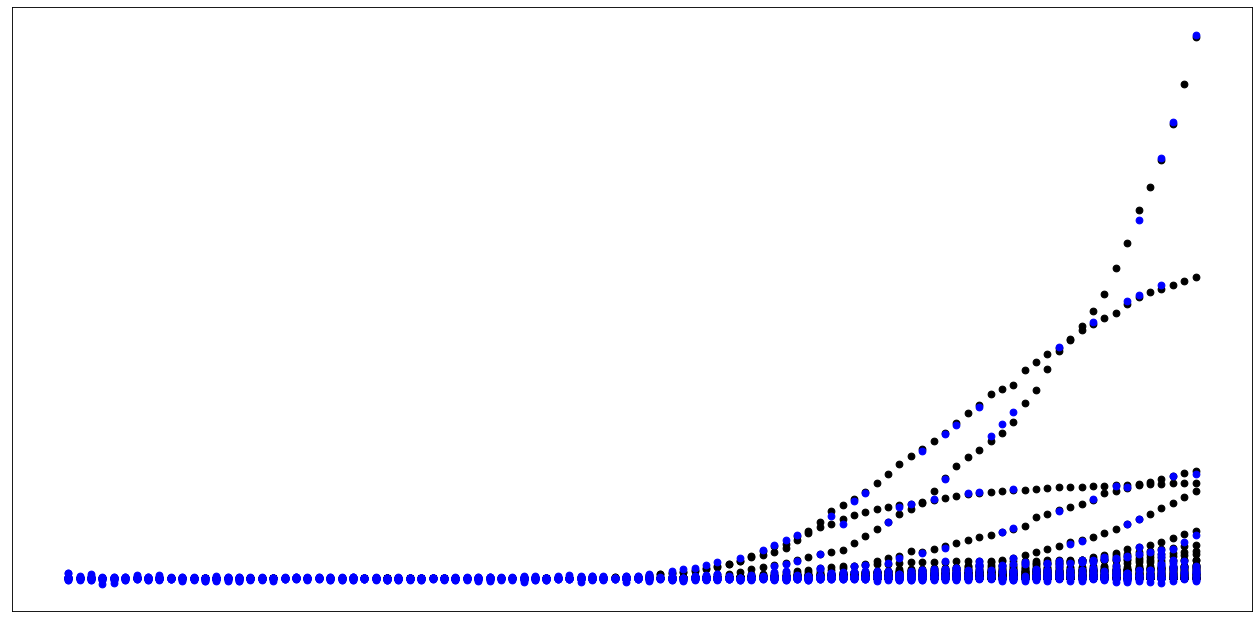

In [13]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In the image above, black points are training and blue ones are test!

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, y_pred))

560518228.2611809


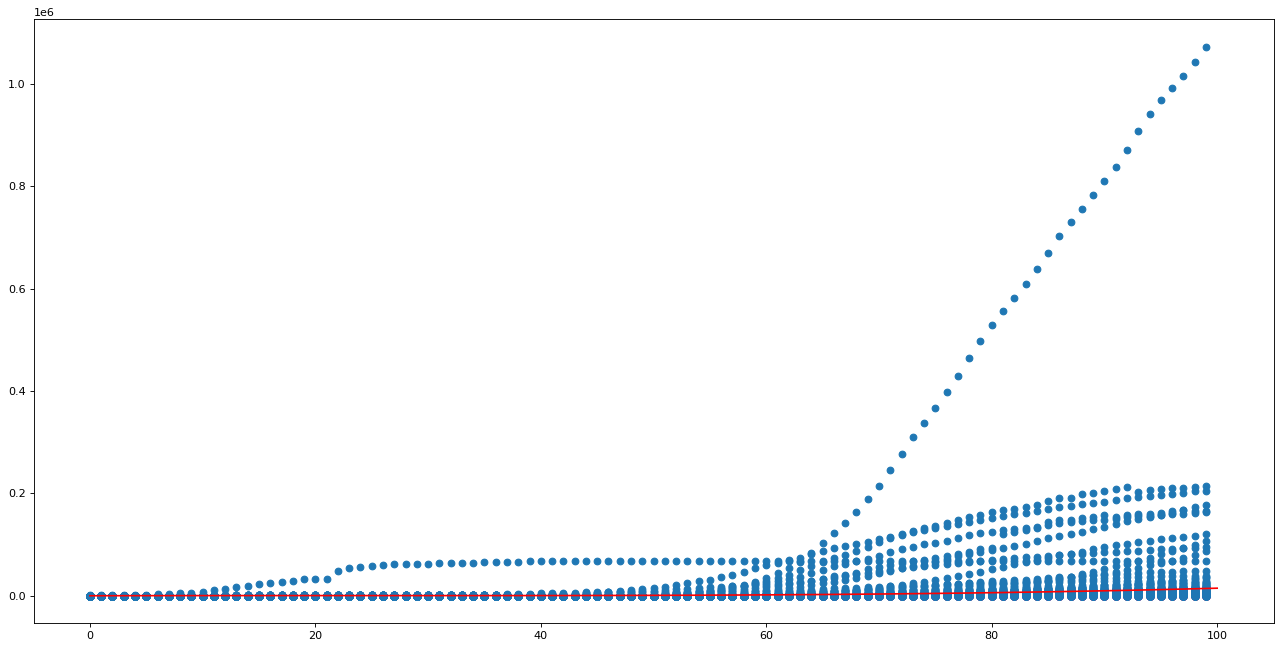

In [ ]:
# 1D polynomial regression
model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))

model_x = np.linspace(0, 100, 100)
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.plot(model_x, model(model_x),'r')
plt.show()

In [ ]:
#Assignment: Report the mean squared error for prediction using differnt degrers of Polynomial Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#1. Report the best model for this data

#2. Repeat for complete data (Change step 3) and report the best model


## Question 1

used full data and tried a large number of polynomial degrees. The results are given below, probably overfitting significantly
* MSE for  2 is 22409841.31414667
* MSE for  3 is 20560548.002745174
* MSE for  4 is 18150800.781314142
* MSE for  5 is 14193417.434568293
* MSE for  6 is 9116090.38274086
* MSE for  7 is 4553747.836499236
* MSE for  8 is 1647485.2115973928
* MSE for  9 is 852998.2341865837
* MSE for  10 is 292411.1100162444
* MSE for  11 is 165820.39517132592
* MSE for  12 is 59911.08382956185
* MSE for  13 is 42823.76465792344
* MSE for  14 is 48262.20936478368
* ***MSE for  15 is 28638.23167982166***
* MSE for  16 is 53084.88832627358
* ***MSE for  17 is 147700.78604214962***
* MSE for  18 is 32719.992937413055
* MSE for  19 is 63681.47360981077


## Question 2

used full data and tried a large number of polynomial degrees. The results are given below, probably overfitting significantly
* MSE for  2 is 34331186667.30354
* MSE for  3 is 34001833764.346592
* MSE for  4 is 33433232649.506947
* MSE for  5 is 31991022437.648296
* MSE for  6 is 29944718276.88996
* MSE for  7 is 26809801017.25322
* MSE for  8 is 21119711070.293663
* MSE for  9 is 15033013967.262125
* MSE for  10 is 10280231834.989937
* MSE for  11 is 8146218309.592263
* MSE for  12 is 5345023199.650728
* MSE for  13 is 4763359922.34723
* MSE for  14 is 4201656845.613243
* MSE for  15 is 4151221457.91315
* ***MSE for  16 is 3453357430.1062393***
* MSE for  17 is 3813436166.323477
* ***MSE for  18 is 3350215570.6483884***
* MSE for  19 is 4873865120.636855


## Code and Data for Q2

Using all data

In [14]:
# getting the dates data only 
data_new_q2=data.iloc[:,4:]
print(data_new_q2.shape)

(266, 221)


In [15]:
data_new_q2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [18]:
# Finding the date indices

data_row_q2=data_new_q2.sum(axis=0)
days_q2=range(0,data_row_q2.shape[0])
days_mat_q2=matlib.repmat(np.array(days_q2),data_new_q2.shape[0],1)
print(days_mat_q2.shape)

(266, 221)


In [25]:
# Let's create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date, Y=#affected
X_2=np.zeros((days_mat_q2.shape[0]*days_mat_q2.shape[1],3))
Y_2=np.zeros((days_mat_q2.shape[0]*days_mat_q2.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new_q2=np.array(data_new_q2)
for r in range(days_mat_q2.shape[0]): #all locations
  #setting Latitude
  X_2[r*days_mat_q2.shape[1]:r*days_mat_q2.shape[1]+days_mat_q2.shape[1],0]=lat_long[r,0]*np.ones((days_mat_q2.shape[1],))

  #setting Longitude
  X_2[r*days_mat_q2.shape[1]:r*days_mat_q2.shape[1]+days_mat_q2.shape[1],1]=lat_long[r,1]*np.ones((days_mat_q2.shape[1],))

  #setting the date
  X_2[r*days_mat_q2.shape[1]:r*days_mat_q2.shape[1]+days_mat_q2.shape[1],2]=np.reshape(days_q2,(days_mat_q2.shape[1],))

  # getting labels
  Y_2[r*days_mat_q2.shape[1]:r*days_mat_q2.shape[1]+days_mat_q2.shape[1]]=np.reshape(data_new_q2[r,:],((days_mat_q2.shape[1],1)))

In [26]:
print(np.shape(X_2))
#Data Preparation is Done!

(58786, 3)


(58786, 3)


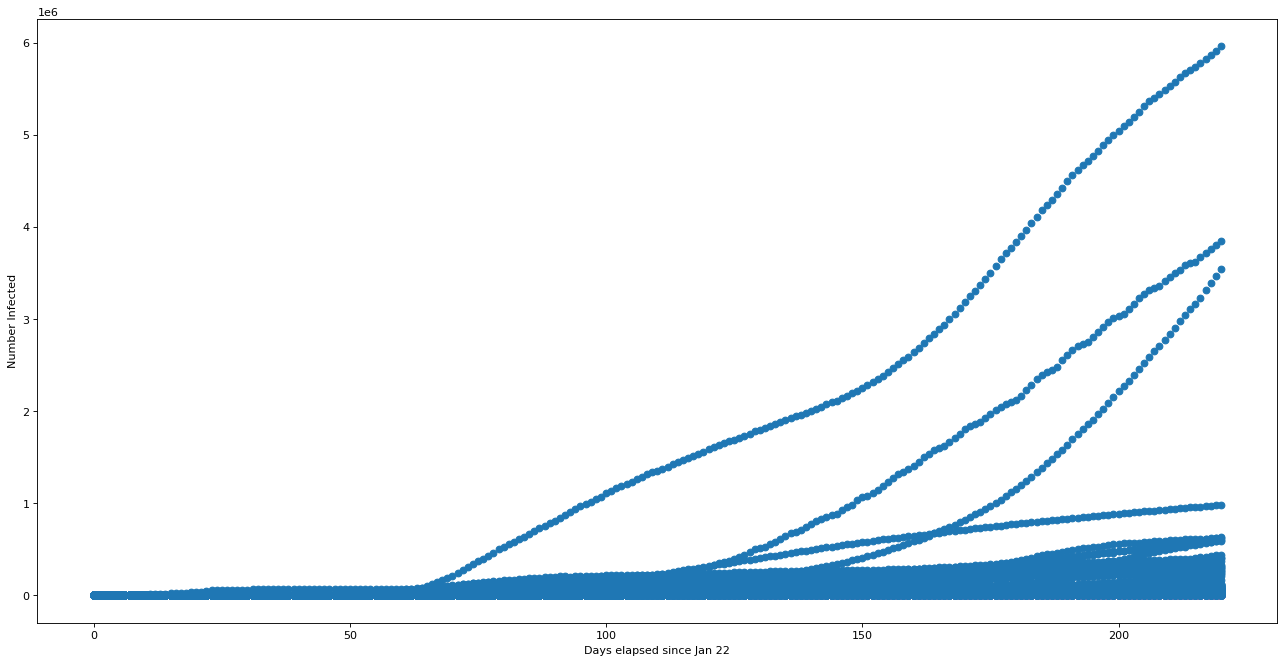

In [27]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(X_2[:,2],Y_2[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

In [28]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1_q2, X_test_1_q2, y_train_q2, y_test_q2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=10)

In [31]:
# optional processing for individual polynomial degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=16)
# Transform both the train and test data
X_train_q2 = poly.fit_transform(X_train_1_q2)
X_test_q2 = poly.fit_transform(X_test_1_q2)
print("New shape of test data=",np.shape(X_test_q2))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train_q2, y_train_q2)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (17636, 969)
Linear Regression Coefficients are= [[ 5.84513004e-26 -5.62996393e-19  2.24765321e-19  2.28821801e-19
  -3.17468131e-20  6.44331448e-20 -6.15856174e-21 -1.97795907e-20
   4.71480974e-20  1.51586263e-20 -5.22038049e-21  2.08668493e-20
  -4.91855898e-21  1.88882609e-20 -3.88734909e-21 -3.05077996e-21
   9.90233269e-21 -4.39581981e-21 -3.21705270e-21  9.23854185e-21
  -4.74720335e-21  2.02228602e-21 -6.66521138e-21 -9.53047781e-21
   3.49807379e-21 -2.94104916e-22 -1.30225281e-21 -8.85452060e-22
   9.44678798e-21 -2.27658603e-21  4.99795772e-21  1.57538060e-21
   1.35925961e-21 -4.15200422e-23 -1.45941861e-22 -1.36000495e-22
  -9.64932640e-24 -8.23876990e-24  2.66046159e-23 -4.06816426e-23
  -7.58698011e-24 -3.61299957e-23 -4.50861954e-23 -3.06718106e-23
  -3.15954285e-23 -3.38188036e-23 -1.78041497e-23 -7.54927978e-24
   1.69484585e-23  1.43587597e-23  9.97912947e-24  1.11032664e-23
  -1.04818615e-23  7.52196636e-24 -1.99788726e-25 -1.30173745e-23
  -

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in range(2, 20):
  poly = PolynomialFeatures(degree=i)
  # Transform both the train and test data
  X_train_q2 = poly.fit_transform(X_train_1_q2)
  X_test_q2 = poly.fit_transform(X_test_1_q2)

  clf = LinearRegression()
  # Fit the model on train data only
  clf.fit(X_train_q2, y_train_q2)
  y_pred_q2 = clf.predict(X_test_q2)

  print('MSE for ', i, 'is', mse(y_test_q2, y_pred_q2))

MSE for  2 is 34331186667.30354
MSE for  3 is 34001833764.346592
MSE for  4 is 33433232649.506947
MSE for  5 is 31991022437.648296
MSE for  6 is 29944718276.88996
MSE for  7 is 26809801017.25322
MSE for  8 is 21119711070.293663
MSE for  9 is 15033013967.262125
MSE for  10 is 10280231834.989937
MSE for  11 is 8146218309.592263
MSE for  12 is 5345023199.650728
MSE for  13 is 4763359922.34723
MSE for  14 is 4201656845.613243
MSE for  15 is 4151221457.91315
MSE for  16 is 3453357430.1062393
MSE for  17 is 3813436166.323477
MSE for  18 is 3350215570.6483884
MSE for  19 is 4873865120.636855


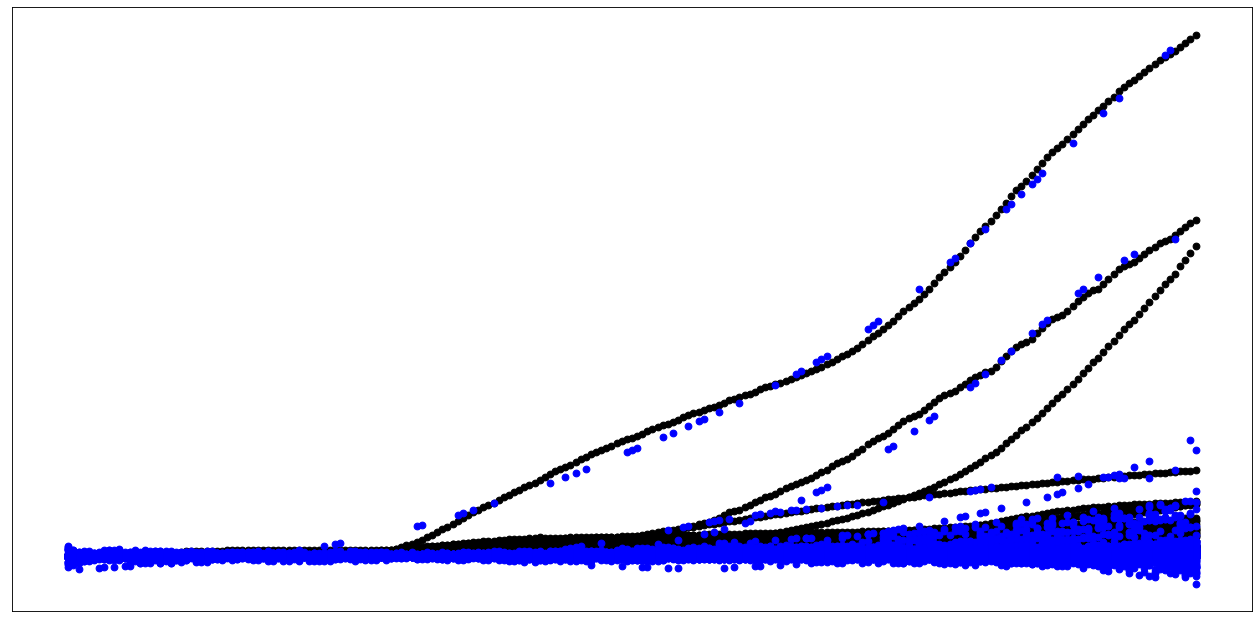

In [32]:
# Predict regression outcome on test data
y_pred_q2 = clf.predict(X_test_q2)
# next plot predictions
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(X_2[:,2], Y_2[:,0],  color='black')
plt.scatter(X_test_1_q2[:,2], y_pred_q2, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()